## Changes in Sediment Provenance on the East Coast Southern Africa


### Introduction

The climate over large parts of Africa is characterised by a strong seasonality with summer rainfall and the approximate position of the ITCZ and its associated rainbelt migrating between the North and South continent over the course of the year. Migrations in the rainbelt therefore govern which areas receive rainfall. Ultimately, this may control the sources of sediment to the eastern coast of Southern Africa. The goal of my project is to create a record of sediment provenance changes in eastern South Africa over the past 150 kyr. This will help determine whether variations in terrigenous sediment sources can inform us about the impacts of global climate changes on local weather systems. 

To accomplish this goal, I have collected K/Ar age data of mud samples from Site U1474 from IODP expedition 361. For this project, I will compare the K-Ar record with the physical properties of the same cores. I will also make use of independent rainfall proxy records as a test for my conclusions about past rainfall as informed by my core records. 

### Study area

<img src="http://publications.iodp.org/proceedings/361/361PR_F03.png" alt="drawing" width="400"/>

Site U1474 is one of the sites from IODP Expedition 361 Southern African climates. Yellow and orange arrows = main surface ocean currents, gray arrows = main pathways of moisture supply to the African continent from the northwest Atlantic (via Congo) and the northwest and southwest Indian Ocean, dashed lines = approximate position of the Intertropical Convergence Zone (ITCZ) and Congo Air Boundary (CAB) (adapted from Reason et al., 2006), purple shaded area = Zambezi Catchment, green shaded area = Limpopo Catchment. AC = Agulhas Current, SEC= South Equatorial Current, SEMC = South East Madagascar Current, NEMC = North East Madagascar Current, EACC = East Africa Coastal Current.

__Image from:__ Hall, I. R., Hemming, S. R., LeVay, L. J., Barker, S., Berke, M. A., Brentegani, L., ... & Crespin, J. G. (2017). Expedition 361 summary. In Proceedings of the International Ocean Discovery Program, 361. International Ocean Discovery Program.

In [3]:
# load all packages
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load all data

*all data is stored in the DATA folder* ../Final_Project/DATA

LR04 data is available at http://lorraine-lisiecki.com/LR04stack.txt

Magnetic susceptibility, natural gamma radiation and reflectance are from http://web.iodp.tamu.edu/LORE/?reportName=rsc&appl=LORE&action=show&filters=%5B%5D&postretrieve=%7B%22scale_id%22:%2214441%22,%22splice_id%22:%222991%22%7D

K-Ar ages and benthic oxygen isotopes are my own datasets. 

In [48]:
#! wget http://lorraine-lisiecki.com/LR04stack.txt

In [4]:
lr4 = pd.read_csv('../Final_Project/DATA/LRO4.csv')
lr4.head()

,Time,d18O,Error
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03


In [5]:
# Benthic Oxygen stack

benthics = pd.read_csv('../Final_Project/DATA/benthics.csv')
benthics.head()

,exp,site,hole,core,type,section,sec_half,pcl_cm,type.1,too_name,top_offset,btm_offset,ccsf_a,sam,mod_am,d18O,avgs
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15.24,16.24,0.1224,3.86784,10.750917,2.830,2.830
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,39.72,40.72,0.3672,11.60352,15.041708,4.369,4.369
2,361,U1474,F,1,H,1,W,150,HRND,SPATULA,51.96,52.96,0.4896,15.47136,19.515042,4.555,4.555
3,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.497,4.504
4,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.510,4.504


In [6]:
# K-Ar ages data

k_ar = pd.read_csv('../Final_Project/DATA/Ages_40.csv')
k_ar.head(2)

,Exp,Site,Hole,Core,Type,Section,Sechalf,PCL,TYPE,Tool_name,TopOffset,BottomOffset,SampleID,SampleWeight,Avg_age,1sigma,PercentStd,CCSFA,SBA,mod_am
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,3,4,CM1,0.8220,349.7,3.5,1.0,0.00,0.00000,7.078
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15,16,CM2,0.8259,340.2,5.2,1.5,0.12,0.00306,10.800


In [7]:
# Magnetic susceptibility
msl = pd.read_csv('../Final_Project/DATA/Magnetic_Susceptibility.csv')
msl = msl.rename(columns={"Magnetic susceptibility (instr. units)": "msl", 
                          "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})

msl = msl.drop_duplicates(subset = "depth", keep="first")
msl.head(3)

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),Depth CSF-A (m),depth,msl,Timestamp (UTC),Instrument,Instrument group,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,A,5.0,0.05,0.05,61.67,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
1,361,U1474,F,1,H,1,A,6.0,0.06,0.06,60.38,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section
2,361,U1474,F,1,H,1,A,7.0,0.07,0.07,57.81,2016-02-16 19:43:24,MS2K-121,SHMSL,SHLF7638011,95486581,Auto-Log Split Section


In [11]:
# Reflectance and colorimetry data
refl1 = pd.read_csv('../Final_Project/DATA/RGB_Channels.csv', sep=',')
refl = refl1.rename(columns={"Depth CSF-A (m)": "CSFA", 
                             "Timestamp (UTC)": "timestamp", 
                             "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})

refl = refl.drop_duplicates(subset = "depth", keep="first")


Text(0.5, 1.0, 'RGB channels downcore record')

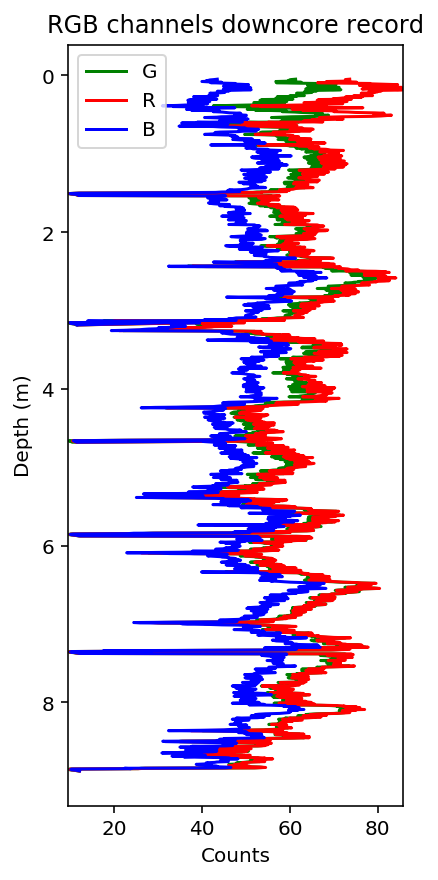

In [12]:
#Figure 1

fig, ax =plt.subplots(figsize=(3,7))

refl.plot(y='depth', x ='G', ax=ax, label='G', c='green')
refl.plot(y='depth', x ='R', ax=ax, label='R', c='red')
refl.plot(y='depth', x ='B', ax=ax, label='B', c='blue')

ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Counts')
ax.set_title('RGB channels downcore record')

In [14]:
# Reflectance Spectrometry. this dataset is not based on RGB 

reflectance = pd.read_csv('../Final_Project/DATA/reflectance.csv')
reflectance = reflectance.rename(columns={"Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth", 
                         "Depth CSF-A (m)": "CSFA", "Reflectance L*": "L", "Reflectance a*": "a",
                                         "Reflectance b*":"b"})

Reflectance = reflectance.drop_duplicates(subset = "depth", keep=False)
Reflectance.head(3)

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),CSFA,depth,...,Tristimulus Y,Tristimulus Z,Normalized spectral data link,Unnormalized spectral data link,Timestamp (UTC),Instrument,Instrument group,Text ID,Test No.,Comments
145,361,U1474,F,1,H,1,A,4.8,0.048,0.048,...,14.59,11.67,NaN,NaN,2016-02-21 13:49:21,USB4000-VIS-RF52054,SHMSL,SHLF7638011,95755161,Auto-Log Split Section
147,361,U1474,F,1,H,1,A,5.2,0.052,0.052,...,14.61,11.73,NaN,NaN,2016-02-21 13:49:21,USB4000-VIS-RF52054,SHMSL,SHLF7638011,95755161,Auto-Log Split Section
148,361,U1474,F,1,H,1,A,5.4,0.054,0.054,...,14.85,12.07,NaN,NaN,2016-02-21 13:49:21,USB4000-VIS-RF52054,SHMSL,SHLF7638011,95755161,Auto-Log Split Section


Text(0.5, 1.0, 'RGB channels downcore record')

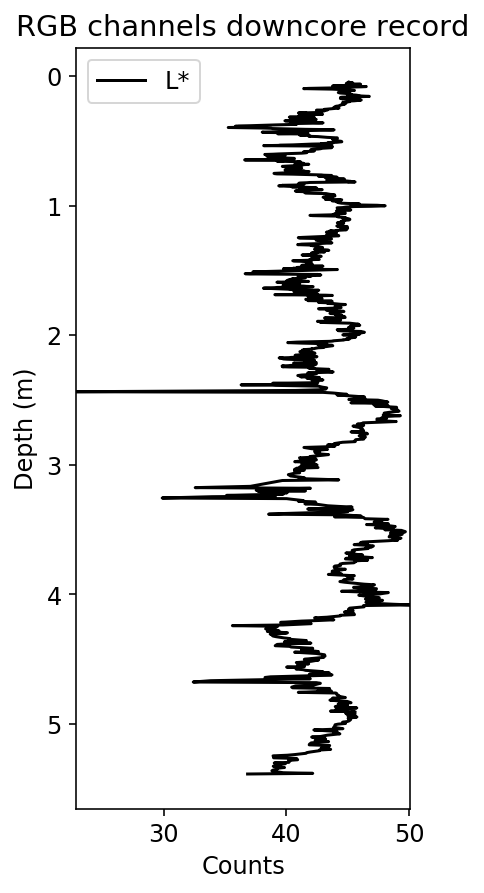

In [49]:
#Figure 2

fig, ax =plt.subplots(figsize=(3,7))

Reflectance.plot(y='depth', x ='L', ax=ax, label='L*', c='k')

ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Counts')
ax.set_title('RGB channels downcore record')

In [32]:
# Gamma ray (natural)
gamma1 = pd.read_csv("../Final_Project/DATA/Natural_Gamma_Radiation.csv")
gamma = gamma1.rename(columns={"NGR total counts (cps)": "ngrT", 
                               "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "depth"})
gamma.head(2)

,Exp,Site,Hole,Core,Type,Sect,Offset (cm),Depth CSF-A (m),depth,ngrT,Error (cps),Relative Error,Timestamp (UTC),Instrument,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,10.0,0.1,0.1,24.250,0.541,0.022,2016-02-16 09:43:32,NGR System,SECT7637991,95459301,NaN
1,361,U1474,F,1,H,1,20.0,0.2,0.2,25.398,0.315,0.012,2016-02-16 09:43:32,NGR System,SECT7637991,95459301,NaN


### Create function for age conversion

All the data I collected or downloaded from the IODP are given in terms of depth. Having the data in terms of the depth scale does not allow for the data to be considered in the context of other climate events or other records. I have created an age model for my data by tuning the benthic oxygen isotope record to the global LR04 record. This allows me to calculate the ages at various depth. 

In [16]:
tie_points = pd.read_csv("../Final_Project/DATA/tie_points_1474",
                         delimiter=" ", header=None, 
                         names=["depth", "age"])
tie_points

,depth,age
0,0.12,9
1,0.49,18
2,3.67,109
3,4.04,126
4,4.65,138
5,5.39,155


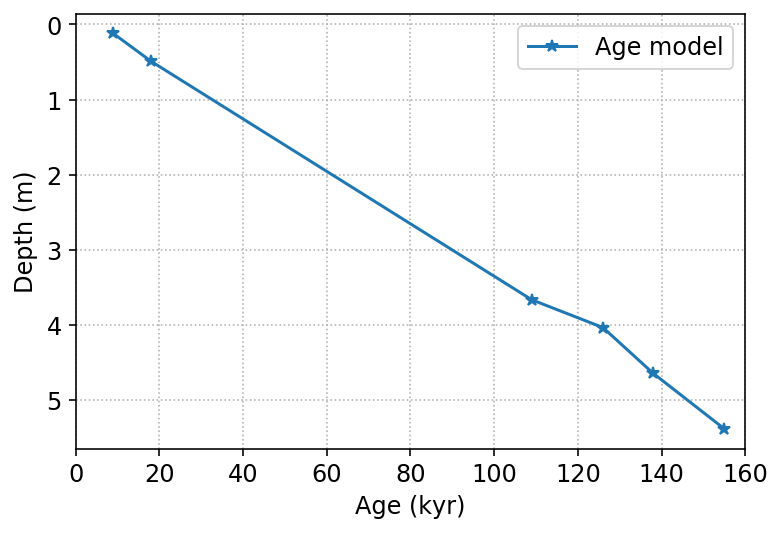

In [39]:
#Figure 3

fig, ax =plt.subplots(figsize=(6,4))

tie_points.plot(x='age', y ='depth', ax=ax, marker ='*', label='Age model')

ax.set_xlim(0,160)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Age (kyr)')
ax.grid(True, which='major', linestyle='dotted')

In [19]:
# first function I tried, it gives ages in kyr
def age_kyr_function(D):
    age = (28.438*D) + 5.4787
    return age
print(age_kyr_function(0.12))
print(age_kyr_function(4.65))

8.891259999999999
137.71540000000002


### Function to convert depth

I defined the funtion by doing a fit through the age-depth model (in excel) and using that equation to convert depth to age. However, as shown above, the function underestimates the ages  by about 0.2 kyr. It also does not account for periods of lower/ increased sedimentation rates. I decided to use SciPy interpolate to create a better function

In [21]:
#Function created with Scipy: 

depth_to_age = interpolate.interp1d(tie_points.depth, tie_points.age, 
                                   kind='linear', bounds_error=False, 
                                   fill_value='extrapolate') #extrapolate for values out of the range in tie_point data


In [22]:
# Loop through the depth column and calculate an age for each data point, using the tie points

ages=[]

for a in benthics['ccsf_a']:
    age = depth_to_age(a)
    ages.append(age)
    
benthics['ages']= ages

#the function was appending the ages as objects so I could not do calculations
# I ended up figuring out that I needed to change the data type in that column. 

benthics_new = benthics.astype({'ages': 'float64'})

In [24]:
# there are some duplicate analyses in the oxygen isotope record to be removed.

benthics_final = benthics_new.drop_duplicates(subset = "avgs", keep="first")

### Calculate ages for points in each dataset. 


In [25]:
# k-ar

ages=[]

for a in k_ar['CCSFA']:
    age = depth_to_age(a)
    ages.append(age)
    
k_ar['ages']= ages
k_ar_new = k_ar.astype({'ages': 'float64'})


In [26]:
# Magnetic Susceptibility

ages=[]

for a in msl['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
msl['ages']= ages
msl_new = msl.astype({'ages': 'float64'})

#msl_new.dtypes

In [30]:
# Reflectance and colorimetry

ages=[]

for a in Reflectance['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
Reflectance['ages'] = ages
Reflectance_new = Reflectance.astype({'ages': 'float64'})

#Reflectance_new.dtypes

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
# Natural Gamma Ray

ages = []

for a in gamma['depth']:
    age = depth_to_age(a)
    ages.append(age)
    
gamma['ages']= ages
gamma_new = gamma.astype({'ages': 'float64'})

#gamma_new.dtypes

### PLOTS


#### 1. Benthic oxygen isotopes. 

Benthic oxygen isotopes are derived from the shells of foraminifera that live on the bottom of the ocean. LR04 is the global compiled record of δ18O which shows changes in ice volume. Because LR04 has an established timescale, it is used to refine and calibrate core records (together with magnetostratigraphy and radiometric dating where available). 

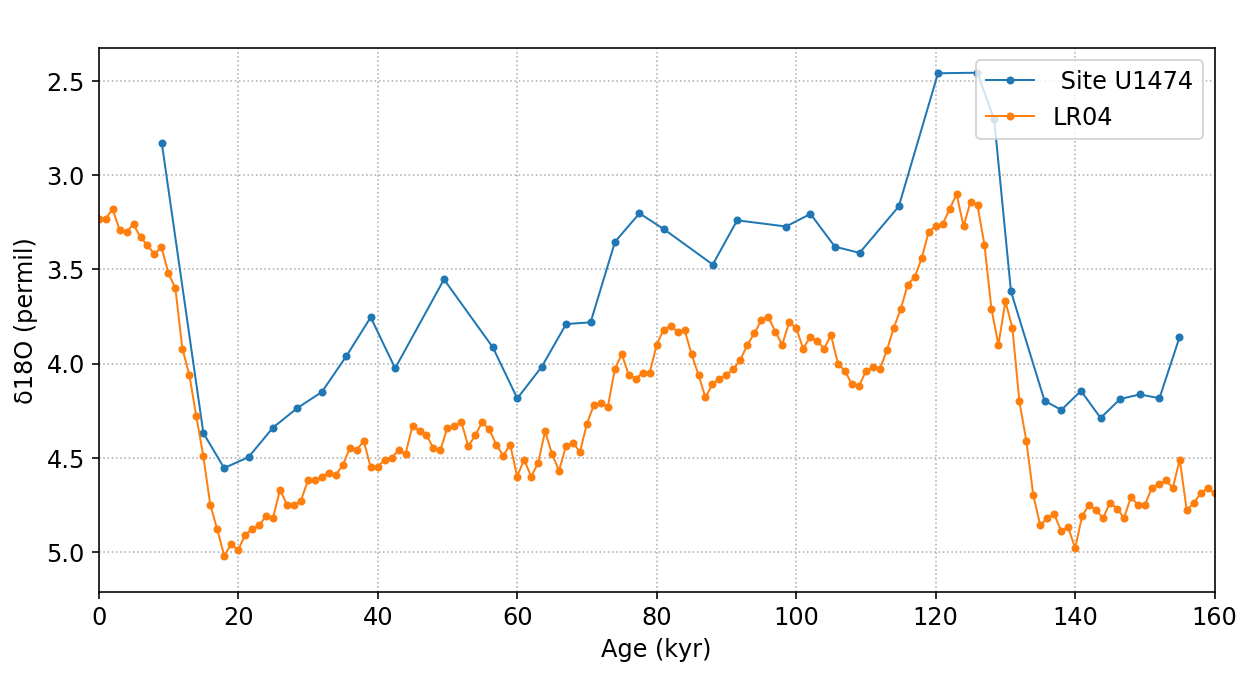

In [60]:
#Figure 4
#Plot LR04 with benthic oxygen isotopes from my study site:

fig, ax =plt.subplots(figsize=(10,5))

benthics_final.plot(x='ages', y ='d18O', ax=ax, marker='.', label =' Site U1474', linewidth = '1')
lr4.plot(x='Time', y = 'd18O', ax=ax, label='LR04', marker = '.', linewidth ='1')

ax.invert_yaxis()
ax.set_title(' ')
ax.set_ylabel('δ18O (permil)')
ax.set_xlabel('Age (kyr)')
ax.set_xlim(0, 160)
ax.legend(loc='upper right')
ax.grid(True, which='major', linestyle='dotted')

mpl.rcParams.update({'font.size': 12})

### 2. Physical Properties 

__Natural Gamma Radiation (NGR)__ 

Minerals that fix K, U, and Th, such as clay minerals, are the principal source of NGR. Radioisotopes with sufficiently long life and that decay to produce an appreciable amount of gamma rays are potassium (40K) with a half-life of 1.3 E9 years, thorium(232Th) with a half-life of 1.4 E10 years, and uranium (238U) with a half-life of 4.4 E9 years. High NGR is related to high percentages of clay minerals.


__Reflectance__

Color parameters provide detailed time series of relative changes in the composition of the bulk material and are frequently used to correlate sections from core to core or hole to hole and to analyze the cyclicity of lithologic changes. For my plots, I have used L* which is a lightness parameter. High reflectance (L*) may represent high carbonate content and/or low clay minerals. 

__Magnetic Susceptibility)__

Magnetic susceptibility is the degree to which a material can be magnetized in an external magnetic field. Magnetic susceptibility is used mostly as a relative proxy indicator for changes in composition that can be linked to paleoclimate-controlled depositional processes. Additional data would be needed to link the magnetic susceptibility changes to particular sediment componets. 

(0, 160)

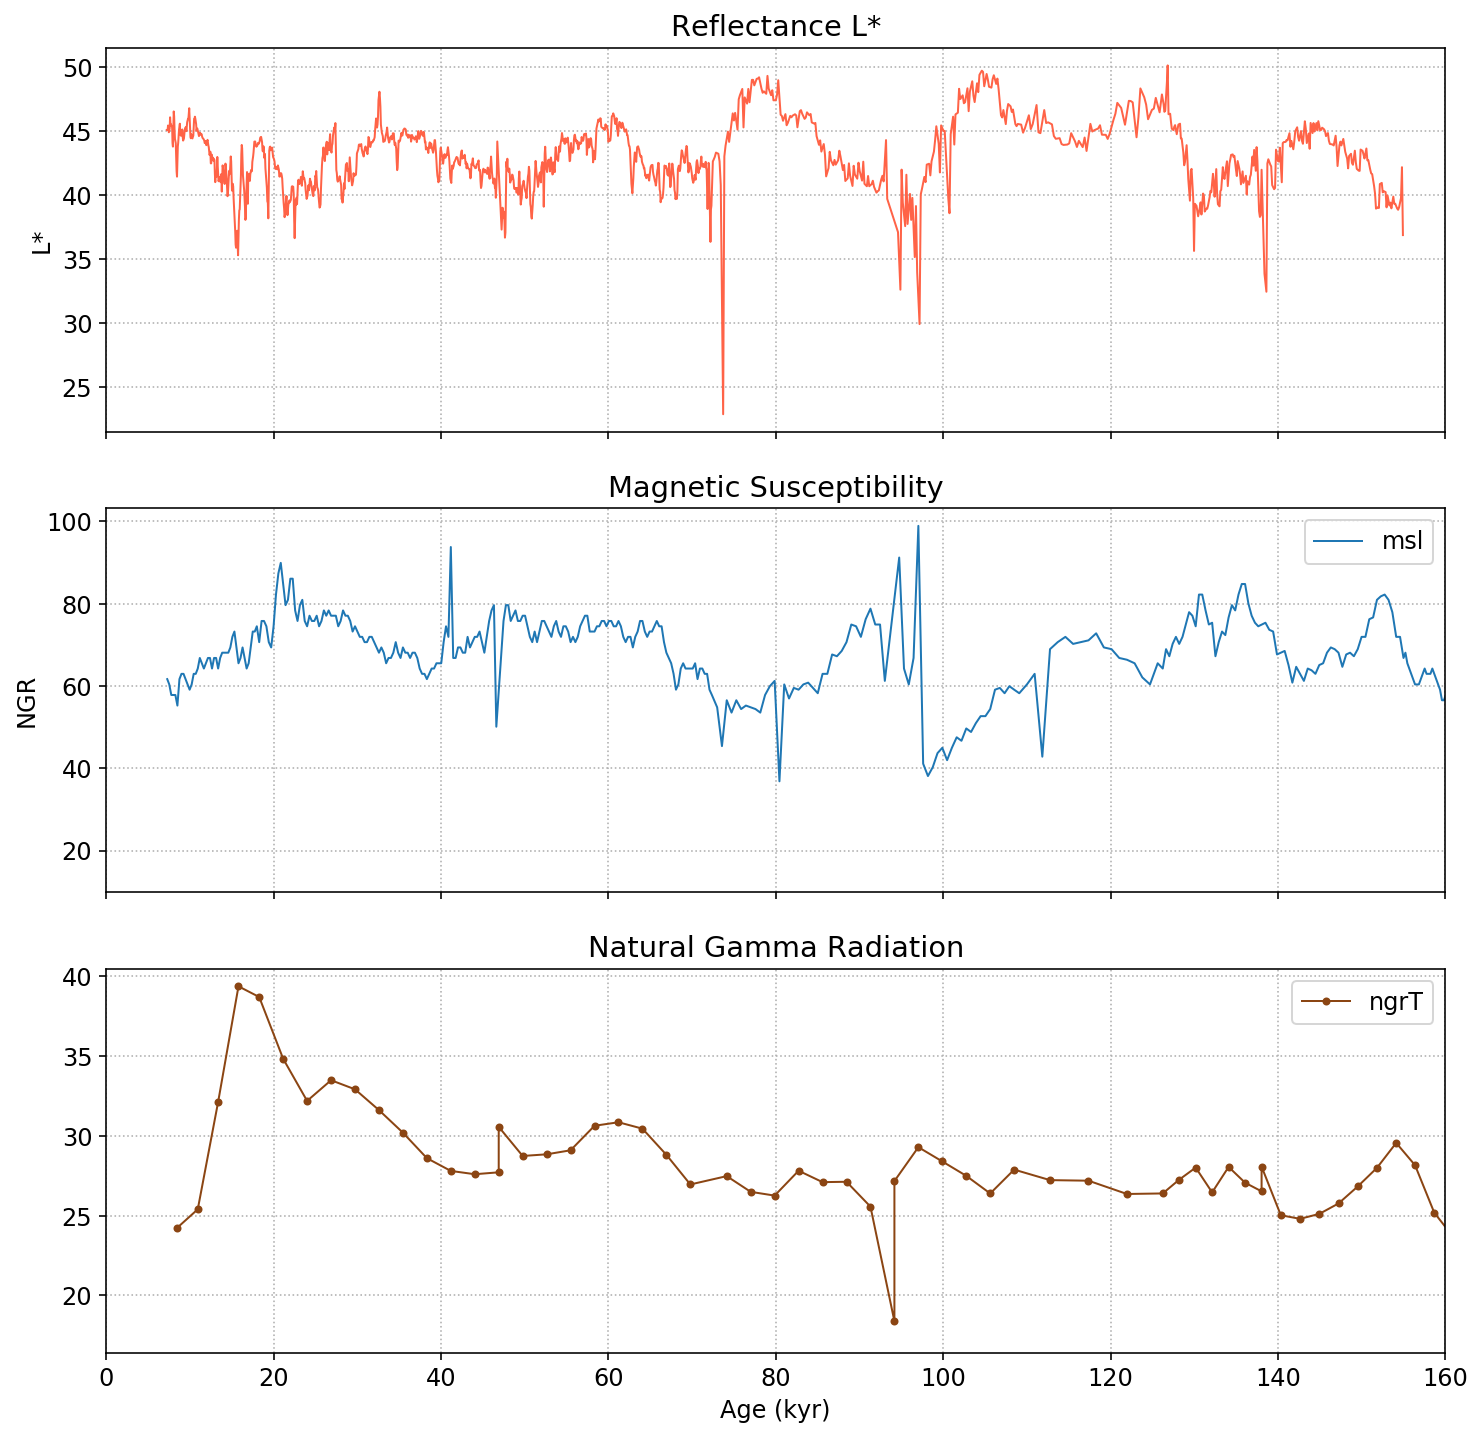

In [59]:
#Figure 5

fig, ax =plt.subplots(figsize=(12,12), nrows=(3))

Reflectance_new.plot(x='ages', y ='L', ax=ax[0], c = 'tomato', linewidth='1')
msl_new.plot(x='ages', y='msl', ax=ax[1], linewidth='1')
gamma_new.plot(x='ages', y='ngrT', ax=ax[2], c = 'saddlebrown', linewidth='1', marker='.')

ax[0].set_xlim(0,160)
ax[0].set_xticklabels([ ])
ax[0].set_ylabel('L*')
ax[0].set_xlabel(' ')
ax[0].get_legend().remove()
ax[0].set_title('Reflectance L*')
ax[0].grid(True, which='major', linestyle='dotted')

ax[1].set_xlim(0,160)
ax[1].set_xticklabels([])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('MSL')
ax[1].set_title('Magnetic Susceptibility')
ax[1].grid(True, which='major', linestyle='dotted')


ax[2].set_xlim(0, 160)
ax[2].set_xlabel('Age (kyr)')
ax[1].set_ylabel('NGR')
ax[2].set_title('Natural Gamma Radiation')
ax[2].grid(True, which='major', linestyle='dotted')
ax[2].set_xlim(0,160)


These plots of the raw data show cyclic changes in sediment composition which result in the variations in color and magnetic susceptibility. Natural gamma radiation does not show particulaly cyclic variation. 

### 3. K-Ar data

K-Ar dating of clay shows the provenance of the terrigenous sediment arriving to site U1474. Due to the differences in the bedrock between the catchment ares that supply sediment to the location, the sediment being transported to the ocean by each river has distinct geochemical characteristics. Differences in provenance based on Ar and other sediment chemistry can potentially be used to track variations in the relative runooff from each catchment, and therefore rainfall variations. For this location, there are two rivers supplying sediment which are the Limpopo (approximately 400 mya average age of clays) and Local rivers (approximatley 200 mya age of clays)

Text(0.5, 0, 'Deposition Age (myr)')

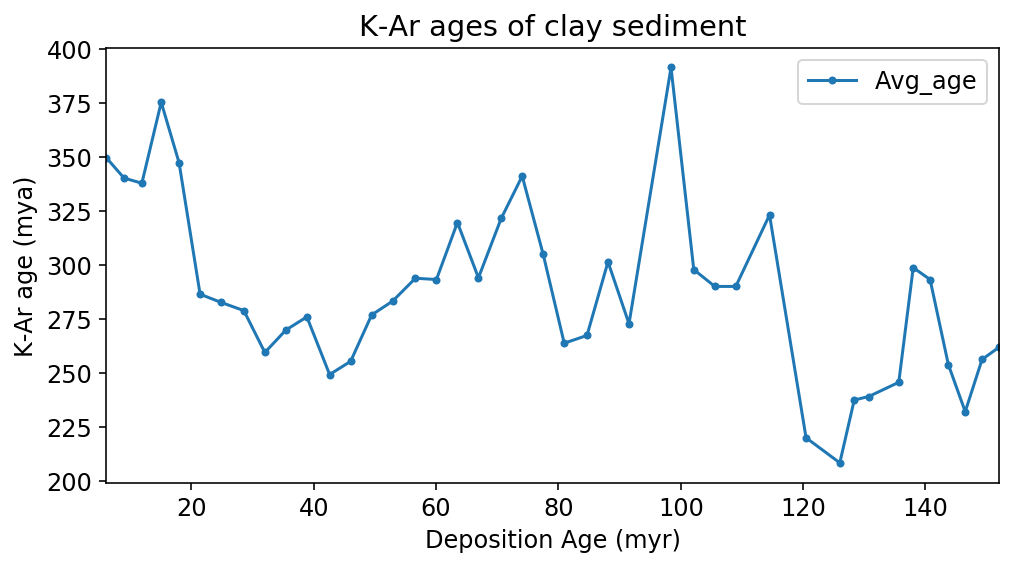

In [44]:
#Figure 6

fig, ax =plt.subplots(figsize=(8,4))
k_ar_new.plot(x = 'ages', y='Avg_age', ax=ax, marker='.')

ax.set_title('K-Ar ages of clay sediment')
ax.set_ylabel('K-Ar age (mya)')
ax.set_xlabel('Deposition Age (myr)')

### Comparison of K-Ar ages and reflectance

Text(0.5, 1.0, 'K-Ar sediment ages')

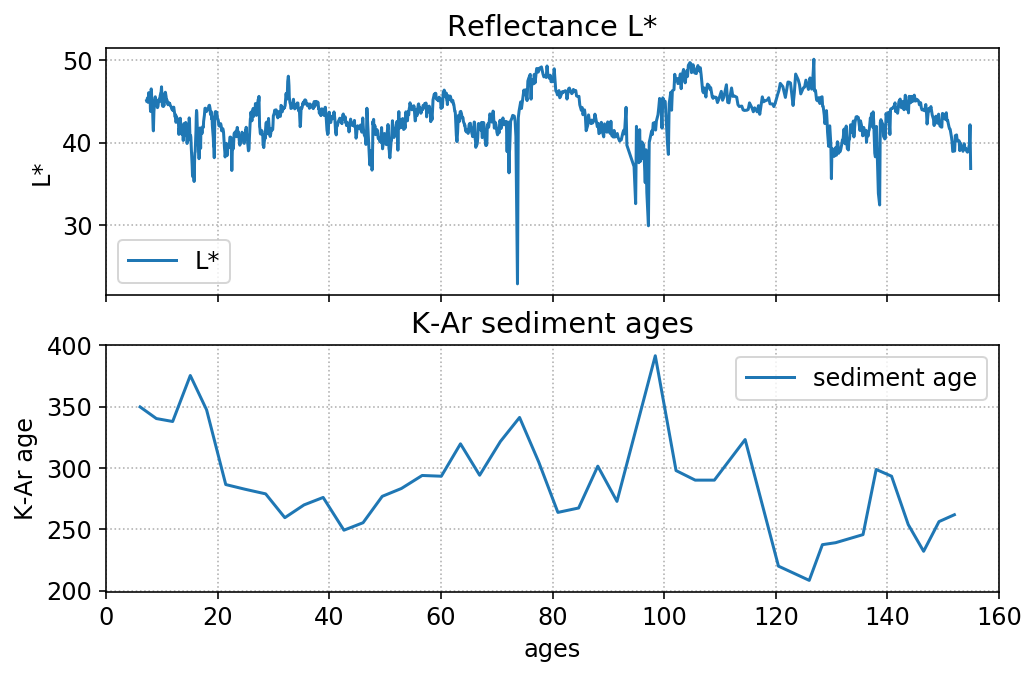

In [55]:
#Figure 7

# compare K-ar ages and magnetic susceptibility

fig, ax =plt.subplots(figsize=(8,5), nrows=(2))

Reflectance_new.plot(x='ages', y ='L', ax=ax[0], label ='L*')
k_ar_new.plot(x ='ages', y='Avg_age', ax=ax[1], label = 'sediment age')

ax[0].set_xlim(0,160)
ax[0].set_ylabel('L*')
ax[0].set_xlabel(' ')
ax[0].set_title('Reflectance L*')
ax[0].grid(True, which='major', linestyle='dotted')
ax[0].set_xticklabels([ ])


ax[1].set_xlim(0,160)
ax[1].grid(True, which='major', linestyle='dotted')
ax[1].set_ylabel('K-Ar age')
ax[1].set_title('K-Ar sediment ages')


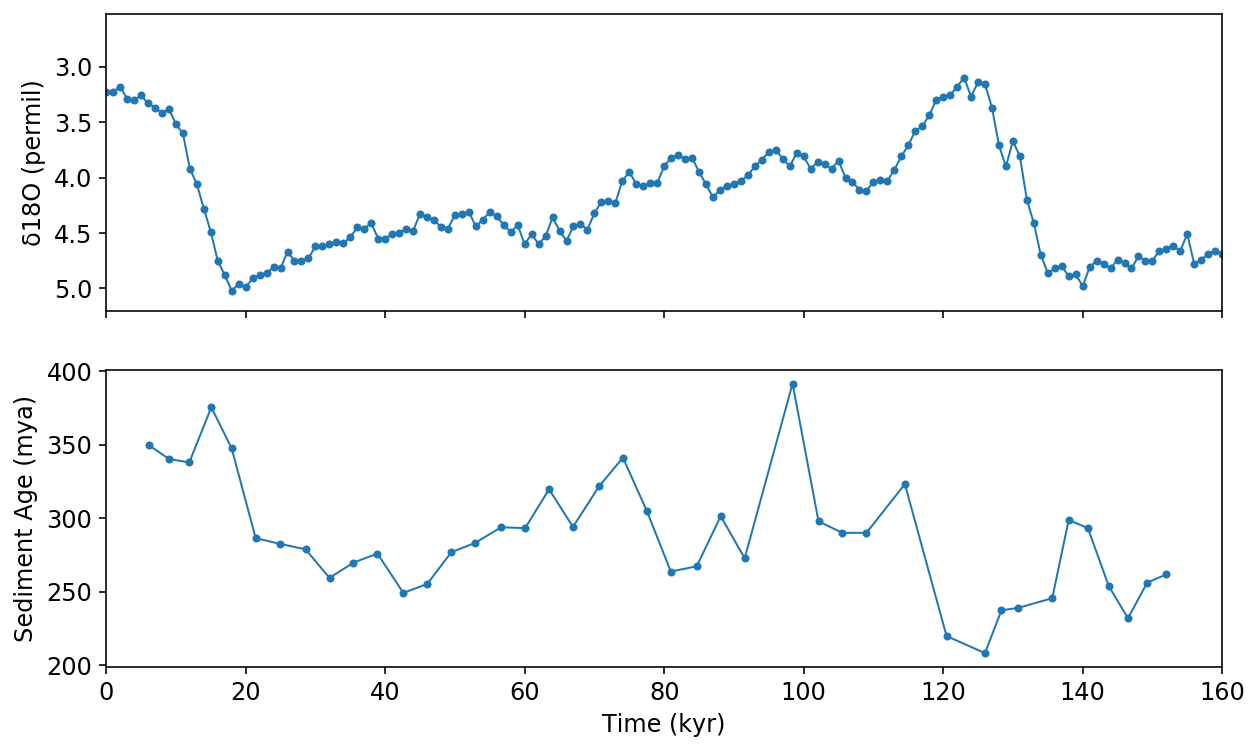

In [57]:
#Figure 8

fig, ax =plt.subplots(figsize=(10, 6), nrows=2)

lr4.plot(x ='Time', y ='d18O', ax=ax[0], marker = '.', linewidth ='1')
#ax[0].set_title('')
ax[0].set_xlim(0, 160)
ax[0].invert_yaxis()
#ax[0].set_ylim(5.5, 2)
ax[0].set_ylabel('δ18O (permil)')
ax[0].set_xticklabels([])
ax[0].set_xlabel(' ')
ax[0].get_legend().remove()
#My data
k_ar_new.plot(x ='ages', y='Avg_age', ax=ax[1], marker = '.', linewidth ='1')

ax[1].set_xlim(0, 160)
#ax[1].invert_yaxis()
ax[1].set_ylabel('Sediment Age (mya)')
ax[1].set_xlabel('Time (kyr)')
ax[1].get_legend().remove()


### Terrigenous sediment variations in context of ice volume changes

Glacial conditions do not seem to have the same impact on K-Ar ages of clays delivered to site U1474. During the LGM (around 20 kyr), there is an increase in ages towards older clays associated with more nothern sourced sediment (relative to the study site, Figure 8). During the penultimate glacial maximum around 140 kyr, there is an increase in age but very small and within the range for southern sourced terrigenous sediment (local rivers, about 200 mya age). Therefore, it seems that sediment sourcing is not primarily dependent on glacial/interglacial conditions. However, as reflectance is also showing the cyclicity of changes in bulk sediment (Figure 7), it seems that terrigenous runoff (and therefore rainfall in this area) is more sensitive to shorter timescale changes in the earth system. Orbital precession, for example has a much shorter timescale (20 kyr) and may be influencing the rainfall and lead to the observed patterns in changing terrigenous sediment. I plan to include precession and insolation data in my future analyses to check these relationships.  